Validate function inputs with Fiatlight
=======================================

Basics
------

Within flatlight, all functions inputs can optionally be validated before the function is executed.

Step 1: we use the `@fl.with_fiat_attributes` decorator to add custom attributes to the function.
        (note: we could also use `fl.add_fiat_attributes` to add custom attributes to a function later on)

Step 2: inside the custom attributes, we can define validation functions for each parameter: for a parameter named "x", the custom attribute must be named "x__validate_value".

> *Note: pay attention to the double underscore in the custom attribute name.*


Step 3: this custom attribute must reference a function that take the value of the parameter as input and return a `fl.DataValidationResult` object. The `fl.DataValidationResult` object has two methods: `ok` and `error`. The `ok` method is used to indicate that the value is valid, while the `error` method is used to indicate that the value is invalid.

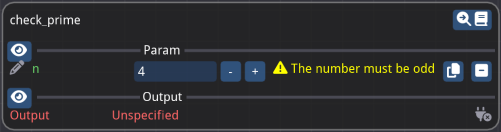

In [3]:
import fiatlight as fl


def validate_odd_number(n: int) -> fl.DataValidationResult:
    if n % 2 == 0:
        return fl.DataValidationResult.error("The number must be odd")
    return fl.DataValidationResult.ok()


@fl.with_fiat_attributes(n__validate_value = validate_odd_number)
def check_prime(n: int) -> bool:
    """Check if a number is prime. For performance reasons, we refuse even numbers.
    """
    if n % 2 == 0:
        raise ValueError("Even numbers are not allowed")
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

fl.run(check_prime, app_name="check_prime")